In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import csv
from matplotlib.colors import Normalize


In [2]:
def rot(x,y,theta):
    xrot = x*np.cos(theta*(np.pi/180)) - y*np.sin(theta*(np.pi/180))
    yrot = x*np.sin(theta*(np.pi/180)) + y*np.cos(theta*(np.pi/180))
    return xrot, yrot

Text(0, 0.5, 'y(R0)')

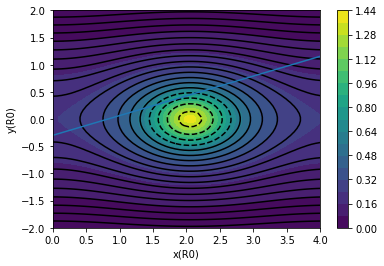

In [11]:
x = np.linspace(0,4,60)
y = np.linspace(-2,2,60)
X,Y = np.meshgrid(x,y)
xtraj = x
ytraj = np.tan(20*(np.pi/180))*xtraj-0.3
a = 1.0
R0 = 1.5286

A = np.log(a*np.cos(X*R0) + np.sqrt(1 + a**2)*np.cosh(Y*R0))
Bz = np.exp(-A)/np.sqrt(3)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contour(X,Y,A,levels=20,colors='k')
ax.plot(x,ytraj)
contourf = ax.contourf(X,Y,Bz,levels=20)
fig.colorbar(contourf)
ax.set_xlabel('x(R0)')
ax.set_ylabel('y(R0)')

In [6]:
mu0 = 1.0
def p(A):
    p = np.exp(-2*A)/3*mu0
    return p
def Bz(A):
    Bz = np.exp(-A)/np.sqrt(3)
    return Bz

Aobs = np.log(a*np.cos(xtraj*R0) + np.sqrt(1 + a**2)*np.cosh(ytraj*R0))
Bxobs = np.sqrt(1+a**2)*np.sinh(ytraj*R0)/(a*np.cos(xtraj*R0) + np.sqrt(1+a**2)*np.cosh(ytraj*R0))
Byobs = a*np.sin(xtraj*R0)/(a*np.cos(xtraj*R0) + np.sqrt(1+a**2)*np.cosh(ytraj*R0))
Btobs = np.sqrt(Bxobs**2 + Byobs**2)
Bzobs = Bz(Aobs)
pobs = p(Aobs)

points = np.arange(60)

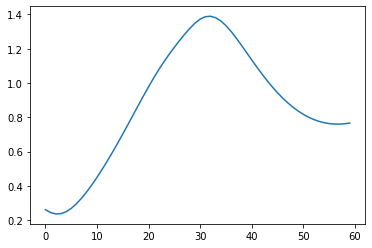

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(points[:],Btobs[:])

In [8]:
delBxdelxobs = (a*np.sqrt(1+a**2)*np.sin(xtraj*R0)*np.sinh(ytraj*R0))/((a*np.cos(xtraj*R0) + np.sqrt(1+a**2)*np.cosh(ytraj*R0))**2)
delBxdelyobs = (a*np.sqrt(1+a**2)*np.cos(xtraj*R0)*np.cosh(ytraj*R0) + 1 + a**2)/((a*np.cos(xtraj*R0) + np.sqrt(1+a**2)*np.cosh(ytraj*R0))**2)
delBxdelzobs = 0.0
delBydelxobs = (a*np.sqrt(1+a**2)*np.cos(xtraj*R0)*np.cosh(ytraj*R0) + a**2)/((a*np.cos(xtraj*R0) + np.sqrt(1+a**2)*np.cosh(ytraj*R0))**2)
delBydelyobs = -(a*np.sqrt(1+a**2)*np.sin(xtraj*R0)*np.sinh(ytraj*R0))/((a*np.cos(xtraj*R0) + np.sqrt(1+a**2)*np.cosh(ytraj*R0))**2)
delBydelzobs = 0.0
delBzdelxobs = np.exp(-Aobs)*Byobs/np.sqrt(3)
delBzdelyobs = -np.exp(-Aobs)*Bxobs/np.sqrt(3)
delBzdelzobs = 0.0


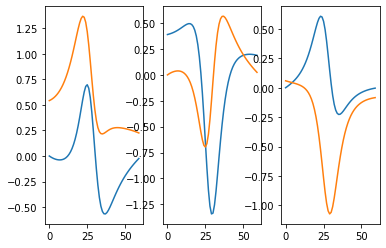

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(131)
ax1.plot(points[:],delBxdelxobs,delBxdelyobs)
ax2 = fig.add_subplot(132)
ax2.plot(points,delBydelxobs,delBydelyobs)
ax3 = fig.add_subplot(133)
ax3.plot(points,delBzdelxobs,delBzdelyobs)

### これで、行列Gの9要素が各ポイント（６０点）について得られたことになる。実際の観測ではこれが直接得られるはず？　あるいは４つの衛星のそれぞれのBの値と位置ベクトルから求める？